[3, 4, 5, 3, 5, 3]
[4, 5, 3, 4, 5, 3]
[5, 2, 1, 5, 1, 2]
[1, 2, 3, 1, 3, 1]


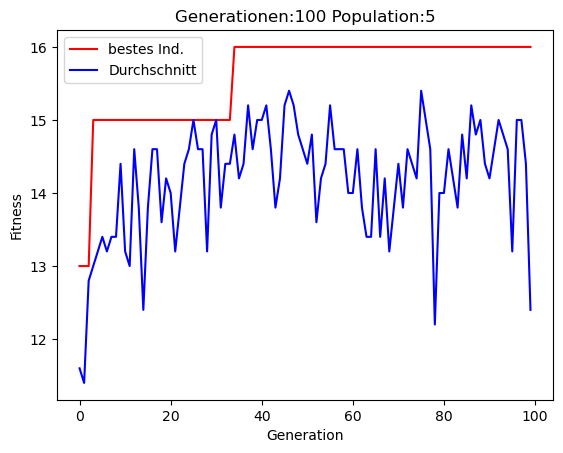

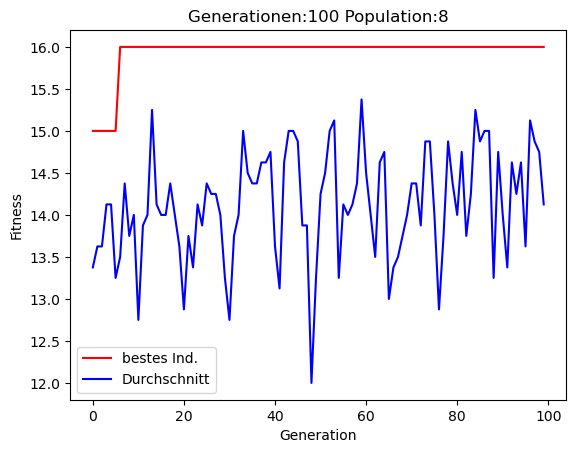

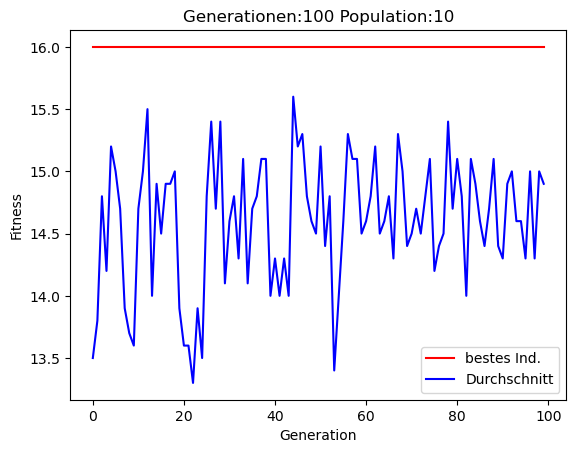

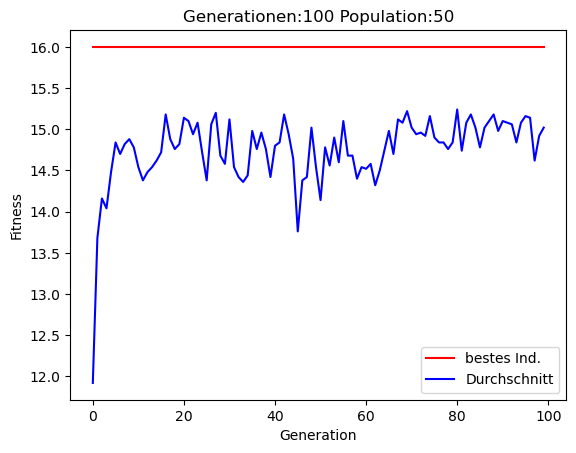

In [94]:
#Faerbe-Problem
import random
import numpy as np
import matplotlib.pyplot as plt

max_farben = 5 #belohne wenig/bestrafe viele farben
wahrscheinlichkeit_rekombinieren = 0.7
wahrscheinlichkeit_mutieren = 0.05
umwandlung = {
    1: [0, 0, 1],
    2: [0, 1, 0],
    3: [0, 1, 1],
    4: [1, 0, 0],
    5: [1, 0, 1]
}
rueckumwandlung = {
    (0, 0, 1):1,
    (0, 1, 0):2,
    (0, 1, 1):3,
    (1, 0, 0):4,
    (1, 0, 1):5
}


def generiere_start_population(population_size, individuum_size):
    population = []  # leere Liste Pop
    for index_pop in range(population_size):
        individuum = []  # leere Liste Indi
        for index_ind in range(individuum_size):
            ziffer = random.choice([1, 2, 3, 4, 5])
            individuum.append(ziffer)
        population.append(individuum) #append wg leerer Liste
    return population


def berechne_Fitness_individuum(population, population_size, individuum_size):
    global max_farben
    fitness_jed_indi = {}
    for index_pop in range(population_size):
        fitness_indi = 0
        anzahl_farben = 0
        #Farb Werte entpacken
        individuum = population[index_pop]
        farbeA, farbeB, farbeC, farbeD, farbeE, farbeF = individuum 

        #Bedingungen pruefen, Werte verteilen
        if(farbeA != farbeB):
            fitness_indi += 2
        if(farbeA != farbeC):
            fitness_indi += 2
        
        if(farbeB != farbeC):
            fitness_indi += 2
        if(farbeB != farbeD):
            fitness_indi += 2
        
        if(farbeC != farbeD):
            fitness_indi += 2

        if(farbeD != farbeB):
            fitness_indi += 2
        if(farbeD != farbeE):
            fitness_indi += 2

        #anzahl farben durch länge set (einzigartige elemente)
        individuum = population[index_pop]
        anzahl_farben = len(set(individuum))
        fitness_indi = fitness_indi + max_farben-anzahl_farben

        #if(anzahl_farben < max_farben):
            #fitness_indi += 5
            #max_farben = anzahl_farben
        
        #if(anzahl_farben > max_farben):
            #fitness_indi -= 5
        
        fitness_jed_indi[index_pop] = fitness_indi
    return fitness_jed_indi


def berechne_wahrscheinlichkeit(fitness_werte, fitness_gesamt):
    wahrscheinlichkeiten = {}
    intervalle = {}
    summand = 0

    for index in range(len(fitness_werte)):
        wahrscheinlichkeit = fitness_werte[index]/fitness_gesamt
        wahrscheinlichkeiten[index] = wahrscheinlichkeit
        #summiere die wahrscheinlichkeiten um intervallgrenzen zu berechnen
        grenze = wahrscheinlichkeit + summand
        intervalle[index] = grenze
        summand = grenze
    #print("Wahrsch:", wahrscheinlichkeiten)
    #print("Intervall", intervalle)
    return intervalle


def selektiere(intervalle):
    gewaehltes_individuum = 0
    zufallszahl = random.random()
    #print("Zufall:", zufallszahl)
    for index in range(len(intervalle)):
        if(zufallszahl < intervalle[index]):
            gewaehltes_individuum = index
            break
    return gewaehltes_individuum
            

def rekombiniere(mutter, vater):
    global wahrscheinlichkeit_rekombinieren
    zufallszahl = random.random()
    if(wahrscheinlichkeit_rekombinieren > zufallszahl):
        return [mutter, vater]
    
    kind1 = mutter.copy()
    kind2 = vater.copy()
    
    zufallszahl = random.randint(1, len(mutter)-2) #sollte zw 1 und 4 sein länge mutter = 6
    kind1[zufallszahl:] = vater[zufallszahl:]
    kind2[zufallszahl:] = mutter[zufallszahl:]

    return[kind1, kind2]


def mutiere(kinder, individuum_size):
    global wahrscheinlichkeit_mutieren
    global umwandlung 
    global rueckumwandlung
    kinder_binaer = []
    
    #zahlen in binär umwandeln
    for index_kinder in range(len(kinder)):
        kind_binaer = []
        
        for index_kind in range(individuum_size):
            zahl = kinder[index_kinder][index_kind]

            for index in range(3):
                kind_binaer.append(umwandlung[zahl][index])
        
        kinder_binaer.append(kind_binaer)
   
    for index_kinder in range(len(kinder_binaer)):
        kind_binaer = kinder_binaer[index_kinder]
        for index_bit in range(len(kind_binaer)):
            zufallszahl = random.random()
            if(zufallszahl < wahrscheinlichkeit_mutieren):
                if(kind_binaer[index_bit] == 0):
                    kind_binaer[index_bit] = 1
                elif(kind_binaer[index_bit] == 1):
                    kind_binaer[index_bit] = 0
            
        kinder_binaer[index_kinder] = kind_binaer
    
    #zurückübersetzen in zahlen
    for index in range(len(kinder_binaer)):
        kind_binaer = kinder_binaer[index]
        kind_zahlen = []
        for i in range(0, len(kind_binaer), 3):
            binaerzahl = []
            binaerzahl = kind_binaer[i:i+3]
            if(binaerzahl == [1, 1, 1] or binaerzahl == [0, 0, 0] or binaerzahl == [1, 1, 0]):
                zufallszahl = random.choice([1, 2, 3, 4, 5])
                kind_zahlen.append(zufallszahl)
                continue
            
            kind_zahlen.append(rueckumwandlung[tuple(binaerzahl)])
        kinder_binaer[index] = kind_zahlen
    return kinder_binaer



def run(generation_size, population_size,individuum_size = 6):
    bestes_individuum = []
    population = generiere_start_population(population_size, individuum_size)
    bestFit = 0
    bestFitOverall = []
    alle_average_fitness = []
    best = None

    
    for generationen in range(generation_size):
        population_neu = []
        #1x pro Generation
        fitness_werte = berechne_Fitness_individuum(population, population_size, individuum_size)
        #Dictionary, um Indi einen Wert zuzuordnen
        fitness_gesamt = sum(fitness_werte.values())
        intervalle = berechne_wahrscheinlichkeit(fitness_werte, fitness_gesamt)
        
        #durchschnittliche fitness berechnen
        average_fitness = fitness_gesamt/ population_size
        alle_average_fitness.append(average_fitness)
        
        #bestes Individuum finden (nicht pro Generation, sondern insgesamt)
        for i in range(len(fitness_werte)):
            fit = fitness_werte[i]
            if(fit>bestFit):
                bestFit = fit
                best = population[i]
        bestFitOverall.append(bestFit)

        best_index = max(fitness_werte, key=fitness_werte.get)
        best_individuum = population[best_index]
        
        #neue Generation erstellen
        for number in range(population_size):
            
            mutter_index = selektiere(intervalle)
            vater_index = selektiere(intervalle)
            while(mutter_index == vater_index):
                vater_index = selektiere(intervalle)
            #print("gewählt:", mutter_index, vater_index)

            mutter = population[mutter_index]
            vater = population[vater_index]
            kinder = []
            kinder = rekombiniere(mutter, vater)
            #print(mutter, vater)
            kinder = mutiere(kinder, individuum_size)
            #print(kinder)
            population_neu.append(kinder[0])
            population_neu.append(kinder[1])
            
            population_neu.append(best_individuum)

        population = population_neu
    g = str(generation_size)
    p = str(population_size)
    plt.figure()
    plt.plot(bestFitOverall, '-r', label= "bestes Ind.")
    plt.plot(alle_average_fitness, '-b', label="Durchschnitt")
    plt.legend(loc="best")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    print(best)
    plt.title("Generationen:"+g+" Population:"+p)
run(100, 5)
run(100, 8)
run(100, 10)
run(100, 50)



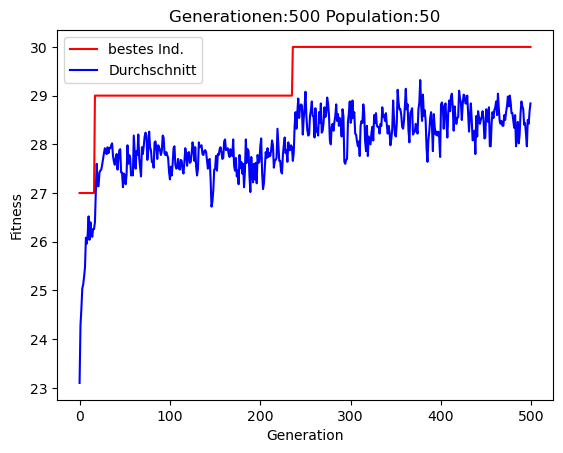

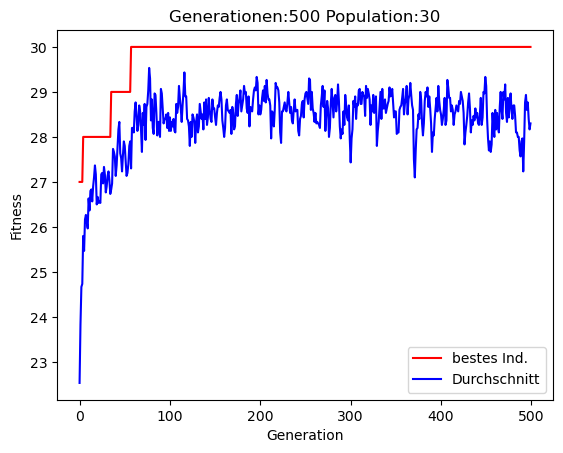

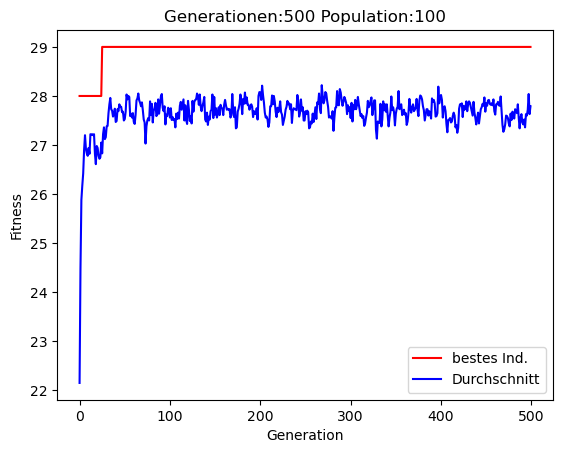

In [79]:
#4 Damen Problem
import random
import matplotlib.pyplot as plt
wahrscheinlichkeit_rekombinieren = 0.7
wahrscheinlichkeit_mutieren = 0.02
umwandlung = {
    #stellen nicht eine eins zu eins umwandlzng dar, spart eine zahl und ich muss keine ungültigen abfangen
    1: [0, 0, 0],
    2: [0, 0, 1],
    3: [0, 1, 0],
    4: [0, 1, 1],
    5: [1, 0, 0],
    6: [1, 0, 1],
    7: [1, 1, 0],
    8: [1, 1, 1]
}
rueckumwandlung = {
    (0,0,0): 1,
    (0,0,1): 2,
    (0,1,0): 3,
    (0,1,1): 4,
    (1,0,0): 5,
    (1,0,1): 6,
    (1,1,0): 7,
    (1,1,1): 8
}

#ich musste nur die gezogenen zahlen anpassen 1-8 statt 1-5
def generiere_start_population(population_size, individuum_size):
    population = []  # leere Liste Pop
    for index_pop in range(population_size):
        individuum = []  # leere Liste Indi
        for index_ind in range(individuum_size):
            ziffer = random.choice([1, 2, 3, 4, 5, 6, 7, 8])
            individuum.append(ziffer)
        population.append(individuum) #append wg leerer Liste
    return population

def berechne_Fitness_individuum(population, population_size, individuum_size):
    fitness_jed_indi = {}
    for index_pop in range(population_size):
        #Konflikte werden abgezogen, der Score bleibt positiv
        fehler = 0
        individuum = population[index_pop]
        #aktuelle Dame
        for xKoordinate in range(len(individuum)):
            yKoordinate = individuum[xKoordinate]
            #andere Damen (inklusive aktuelle)
            for xKoordinate2 in range(xKoordinate+1, len(individuum)):#keine doppelten
                yKoordinate2 = individuum[xKoordinate2]

                if(xKoordinate == xKoordinate2):
                    continue
                #andere Dame befindet sich in selber Zeile wie aktuelle Dame
                if(yKoordinate == yKoordinate2):
                    fehler += 1

                #die Diagonalen, sind die Seiten des Steigungsdreiecks gleich lang, liegen die Damen auf einer Diagonalen
                xVersatz = abs(xKoordinate - xKoordinate2)
                yVersatz = abs(yKoordinate - yKoordinate2)
                
                if(xVersatz == yVersatz):
                    fehler += 1

        fitness_indi = 30 - fehler
        fitness_jed_indi[index_pop] = fitness_indi
    return fitness_jed_indi

def berechne_wahrscheinlichkeit(fitness_werte, fitness_gesamt):
    wahrscheinlichkeiten = {}
    intervalle = {}
    summand = 0

    #for index in range(len(fitness_werte)):
        #wahrscheinlichkeit = fitness_werte[index]/fitness_gesamt
    for index, fit in fitness_werte.items():
        wahrscheinlichkeit = fit / fitness_gesamt
        #summiere die wahrscheinlichkeiten um intervallgrenzen zu berechnen
        grenze = wahrscheinlichkeit + summand
        intervalle[index] = grenze
        summand = grenze
    #print("Wahrsch:", wahrscheinlichkeiten)
    #print("Intervall", intervalle)
    return intervalle

def selektiere(intervalle):
    gewaehltes_individuum = 0
    zufallszahl = random.random()
    #print("Zufall:", zufallszahl)
    for index in range(len(intervalle)):
        if(zufallszahl < intervalle[index]):
            gewaehltes_individuum = index
            break
    return gewaehltes_individuum

def rekombiniere(mutter, vater):
    global wahrscheinlichkeit_rekombinieren
    zufallszahl = random.random()
    if(wahrscheinlichkeit_rekombinieren < zufallszahl):
        return [mutter, vater]
    
    kind1 = mutter.copy()
    kind2 = vater.copy()
    
    zufallszahl = random.randint(1, len(mutter)-1) #sollte zw 1 und 8 sein länge mutter = 8
    kind1[zufallszahl:] = vater[zufallszahl:]
    kind2[zufallszahl:] = mutter[zufallszahl:]

    return[kind1, kind2]

def mutiere(kinder, individuum_size):
    global wahrscheinlichkeit_mutieren
    global umwandlung 
    global rueckumwandlung
    kinder_binaer = []
    
    #zahlen in binär umwandeln
    for index_kinder in range(len(kinder)):
        kind_binaer = []
        
        for index_kind in range(individuum_size):
            zahl = kinder[index_kinder][index_kind]

            for index in range(3):
                kind_binaer.append(umwandlung[zahl][index])
        
        kinder_binaer.append(kind_binaer)
   
    for index_kinder in range(len(kinder_binaer)):
        kind_binaer = kinder_binaer[index_kinder]
        for index_bit in range(len(kind_binaer)):
            zufallszahl = random.random()
            if(zufallszahl < wahrscheinlichkeit_mutieren):
                if(kind_binaer[index_bit] == 0):
                    kind_binaer[index_bit] = 1
                elif(kind_binaer[index_bit] == 1):
                    kind_binaer[index_bit] = 0
            
        kinder_binaer[index_kinder] = kind_binaer
    
    #zurückübersetzen in zahlen
    for index in range(len(kinder_binaer)):
        kind_binaer = kinder_binaer[index]
        kind_zahlen = []
        for i in range(0, len(kind_binaer), 3):
            binaerzahl = []
            binaerzahl = kind_binaer[i:i+3]
            
            kind_zahlen.append(rueckumwandlung[tuple(binaerzahl)])
        kinder_binaer[index] = kind_zahlen
    return kinder_binaer


def run(generation_size, population_size, individuum_size = 8):
    beste_Fitness = []
    population = generiere_start_population(population_size, individuum_size)
    best = None
    bestFit = 0
    bestFitOverall = []
    alle_average_fitness = []
    
    #setup Generation: Fitness berechnen, wahrscheinlichkeit aufstellen
    for generationen in range(generation_size):
        population_neu = []
        bestFit_generation = 0
        fitness_werte = berechne_Fitness_individuum(population, population_size, individuum_size)
        fitness_gesamt = sum(fitness_werte.values())
        intervalle = berechne_wahrscheinlichkeit(fitness_werte, fitness_gesamt)
        
        #durchschnittliche fitness berechnen
        average_fitness = fitness_gesamt/ population_size
        alle_average_fitness.append(average_fitness)
        
        #bestes Individuum finden (nicht pro Generation, sondern insgesamt)
        for i in range(len(fitness_werte)):
            fit = fitness_werte[i]
            if(fit>bestFit):
                bestFit = fit     
        bestFitOverall.append(bestFit)

        best_index = max(fitness_werte, key=fitness_werte.get)
        best_individuum = population[best_index]

        
        #neue Generation aus alter erzeugen
        for number in range(population_size):
    
            mutter_index = selektiere(intervalle)
            vater_index = selektiere(intervalle)
            while(mutter_index == vater_index):
                vater_index = selektiere(intervalle)
            mutter = population[mutter_index]
            vater = population[vater_index]
            kinder = []
            kinder = rekombiniere(mutter, vater)
            kinder = mutiere(kinder, individuum_size)
            population_neu.append(kinder[0])
            population_neu.append(kinder[1])
            #population_neu.append(random.choice(kinder))
            population_neu.append(best_individuum)

        population = population_neu
    g=str(generation_size)
    p=str(population_size)
    #print(beste_Fitness)
    #print(bestFitOverall)
    plt.figure()
    plt.plot(bestFitOverall, '-r', label= "bestes Ind.")
    plt.plot(alle_average_fitness, '-b', label="Durchschnitt")
    plt.legend(loc="best")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Generationen:"+g+" Population:"+p)
    
run(500,50)
run(500,30)
run(500,100)
